# TASK 2_Supervised Machine Learning

Objective:Prediction using Supervised ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\astha\Desktop\score.csv")

In [3]:
df.head()

,hour,score
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
hour     25 non-null float64
score    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [6]:
df['hour'].unique()

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 1.9, 6.1, 7.4, 4.8, 3.8, 6.9, 7.8])

In [7]:
df['score'].unique()

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 24,
       67, 69, 54, 35, 76, 86], dtype=int64)

In [8]:
df.dtypes

hour     float64
score      int64
dtype: object

In [9]:
df.describe()

,hour,score
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
df['hour'].isnull().sum() # There is no null values in Hours column.

0

In [11]:
df['score'].isnull().sum()

0

In [12]:
df['hour'].value_counts()

2.5    2
2.7    2
3.8    1
8.5    1
3.5    1
1.5    1
5.5    1
4.5    1
5.9    1
6.1    1
7.7    1
1.9    1
1.1    1
4.8    1
8.3    1
8.9    1
7.4    1
7.8    1
5.1    1
3.2    1
9.2    1
3.3    1
6.9    1
Name: hour, dtype: int64

In [33]:
df.rename(columns={'hour':'Study_hours'},inplace=True)

In [34]:
df.head()

,Study_hours,score
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [35]:
df.isnull().sum()

Study_hours    0
score          0
dtype: int64

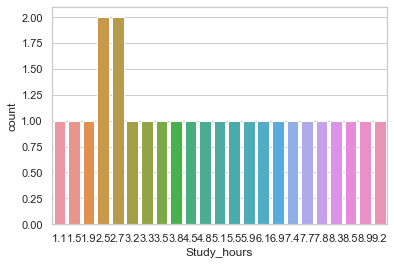

In [36]:
sns.countplot(x='Study_hours',data=df)

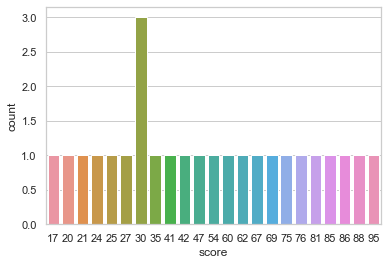

In [37]:
sns.countplot('score',data=df)

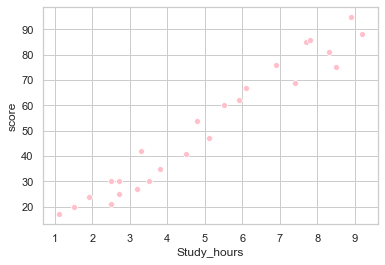

In [58]:
sns.set(style='whitegrid')
sns.scatterplot(x='Study_hours',y='score',data=df,markers=False,legend='brief',color='pink')

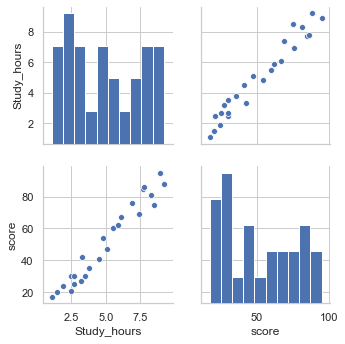

In [60]:
sns.set(style='whitegrid')
sns.pairplot(df)

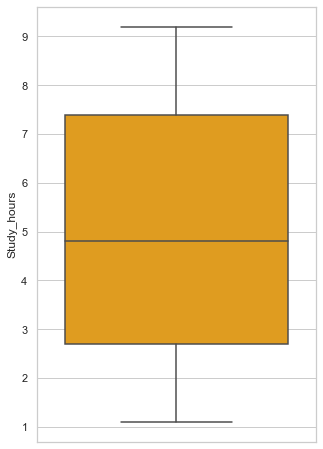

In [57]:
plt.figure(figsize=(5,8))
sns.boxplot(y='Study_hours',data=df,color='orange')

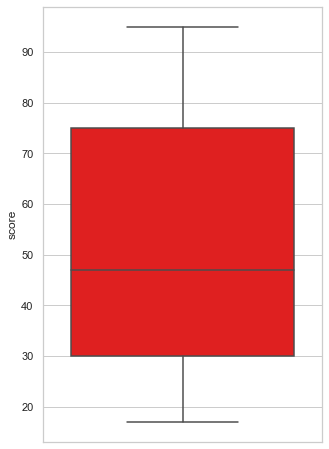

In [56]:
plt.figure(figsize=(5,8))
sns.boxplot(y='score',data=df,color='red')

In [61]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)

In [73]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


In [74]:
line = regressor.coef_*x+regressor.intercept_
line

array([[26.79480124],
       [52.56250809],
       [33.73226078],
       [86.25874013],
       [36.70545772],
       [16.88414476],
       [93.19619966],
       [56.52677068],
       [84.27660883],
       [28.77693254],
       [78.33021494],
       [60.49103328],
       [46.6161142 ],
       [34.72332643],
       [12.91988217],
       [90.22300272],
       [26.79480124],
       [20.84840735],
       [62.47316457],
       [75.357018  ],
       [28.77693254],
       [49.58931115],
       [39.67865467],
       [70.40168976],
       [79.32128059]])

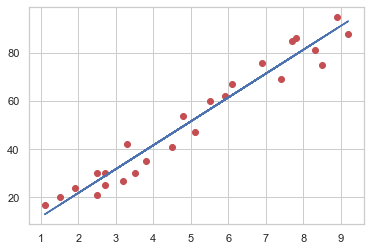

In [75]:
plt.scatter(x, y,color='r')
plt.plot(x, line);
plt.show()

In [76]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the score

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [77]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


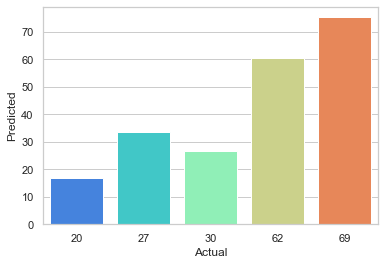

In [78]:
sns.barplot('Actual','Predicted',data=data,palette='rainbow')

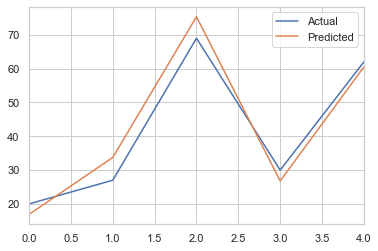

In [79]:
data.plot(kind='line',label='Actual')
plt.legend()

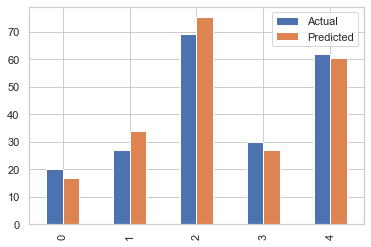

In [80]:
data.plot(kind='bar',label='Actual')

In [81]:
Study_hours=9.25
own_prediction=regressor.predict([[Study_hours]]).round(2)
print("No of Hours = {}".format(Study_hours))
print("Predicted Score = {}".format(own_prediction[0]))

No of Hours = 9.25
Predicted Score = 93.69


In [82]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE=mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("Mean Absolute Error=",MAE)
print("Root Mean Square Error=",RMSE)

Mean Absolute Error= 4.183859899002975
Root Mean Square Error= 4.6474476121003665
